In [1]:
import numpy as np
import pandas as pd
# import talib as ta
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import MinMaxScaler
#from pykalman import KalmanFilter
np.random.seed(107)
#import pywt

import sys
from datetime import datetime

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
#py.init_notebook_mode(connected=True)
%matplotlib inline

/home/ansel/miniconda3/envs/tf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-27 08:41:51.015756: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 08:41:51.068052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745743311.089416   72344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745743311.094287   72344 cuda_blas.cc:1407]

In [2]:
clusters = pd.read_csv('/mnt/d/GitHub/WQU-Capstone/data/sample_cluster_Index_data.csv')
clusters

,Unnamed: 0,Index,Cluster
0,0,VXUS,5
1,1,BND,2
2,2,QQQ,2
3,3,BNDX,9
4,4,VTIP,5
5,5,VCIT,1
6,6,TLT,1
7,7,VCSH,8
8,8,VGIT,1
9,9,MBB,8


In [3]:
len(clusters)

44

In [4]:
clusters.drop("Unnamed: 0", axis = 1, inplace = True)
clusters

,Index,Cluster
0,VXUS,5
1,BND,2
2,QQQ,2
3,BNDX,9
4,VTIP,5
5,VCIT,1
6,TLT,1
7,VCSH,8
8,VGIT,1
9,MBB,8


In [5]:
len(clusters)

44

In [6]:
clusters.groupby(['Cluster']).count()

,Index
Cluster,
0,6
1,7
2,5
3,6
4,1
5,4
6,9
7,1
8,4


In [7]:
clusters.groupby(['Cluster']).count()

,Index
Cluster,
0,6
1,7
2,5
3,6
4,1
5,4
6,9
7,1
8,4


In [8]:
cluster_list = []

for i in range(10):
    cluster_list.append([])

for i in range(len(clusters)):
    cluster_list[clusters.iloc[i][1]].append(clusters.iloc[i][0])

/tmp/ipykernel_72344/2886092657.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [9]:
cluster_list

[['IEI', 'IGIB', 'IBB', 'PDBC', 'SQQQ', 'FALN'],
 ['VCIT', 'TLT', 'VGIT', 'IEF', 'SMH', 'USIG', 'CIBR'],
 ['BND', 'QQQ', 'VONG', 'PFF', 'MCHI'],
 ['VGSH', 'SHY', 'TQQQ', 'ACWX', 'ANGL', 'ICLN'],
 ['SOXX'],
 ['VXUS', 'VTIP', 'EMB', 'RDVY'],
 ['IUSB', 'IGSB', 'SHV', 'ACWI', 'VCLT', 'VGLT', 'SCZ', 'QYLD', 'KBWB'],
 ['BSCR'],
 ['VCSH', 'MBB', 'SDVY', 'FTSM'],
 ['BNDX']]

In [10]:
def find_cointegrated_pairs(data, indice_list):
    
    n = len(indice_list)
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    
    pairs = {}
    
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[indice_list[i]]["Close"]
            S2 = data[indice_list[j]]["Close"]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.01:
                pairs[(indice_list[i], indice_list[j])] = [score, pvalue]
    return score_matrix, pvalue_matrix, pairs

In [11]:
from sklearn.linear_model import LinearRegression

def find_maxr2_pairs(data, indice_list):

    n = len(indice_list)
    score_matrix = np.zeros((n, n))
    
    pairs = {}
    
    for i in range(n):
        for j in range(i+1, n):
            # convert to uniform/quantile distribution, perform LR, find R^2
            model = LinearRegression()
            X = data[indice_list[i]][["Close"]]
            y = data[indice_list[j]]["Close"]
            Ux = X.rank(pct=True)
            Uy = y.rank(pct=True)
            model = model.fit(Ux, Uy)
            r2_score = model.score(Ux, Uy)
            score_matrix[i, j] = r2_score
            if r2_score >= 0.95:
                pairs[(indice_list[i], indice_list[j])] = r2_score
    return score_matrix, pairs

In [12]:
from sklearn.feature_selection import mutual_info_regression

def find_mi_pairs(data, indice_list):

    n = len(indice_list)
    score_matrix = np.zeros((n, n))
    
    pairs = {}
    
    for i in range(n):
        for j in range(i+1, n):
            # convert to uniform/quantile distribution, perform LR, find R^2
            X = data[indice_list[i]][["Close"]]
            y = data[indice_list[j]]["Close"]
            mi = mutual_info_regression(X, y)
            score_matrix[i, j] = mi
            if mi >= 2:
                pairs[(indice_list[i], indice_list[j])] = mi
    return score_matrix, pairs

In [13]:
def find_phik_pairs(data, indice_list):
    
    pairs = {}
    px_last_data = small_data[indice_list].xs('Close', axis=1, level=1, drop_level=True)
    interval_cols = px_last_data.columns
    phik_overview = px_last_data.phik_matrix(interval_cols=interval_cols)
    phik_overview.round(4)
    upper_t = phik_overview.where(np.triu(np.ones(phik_overview.shape)).astype(np.bool))
    stacked_series = upper_t.stack()
    filtered = stacked_series[(stacked_series>0.95) & (stacked_series != 1)]
    pairs = list(zip(filtered.index, filtered.values))
    return phik_overview, pairs

In [14]:
etf_tic= pd.read_excel('/mnt/d/GitHub/WQU-Capstone/data/etf_list.xlsx')['Symbol']

data_dic = {}#pd.DataFrame()

for tic in etf_tic:
    data_dic[tic] = yf.download(tic, 
                    start='2017-12-31', 
                    end='2025-04-01', 
                    progress=False,
    )
    data_dic[tic].columns = data_dic[tic].columns.droplevel(1)
    data_dic[tic].columns.name = None

data = pd.concat(data_dic.values(), axis=1, keys=data_dic.keys())
data

YF.download() has changed argument auto_adjust default to True


VXUS                                                  BND  \
                Close       High        Low       Open   Volume      Close   
Date                                                                         
2018-01-02  46.227242  46.227242  45.993607  46.058056  1937800  66.258331   
2018-01-03  46.549496  46.557554  46.331974  46.348087  1391300  66.315331   
2018-01-04  46.936207  46.976491  46.831477  46.863700  1298600  66.282730   
2018-01-05  47.250397  47.258452  47.024817  47.105382  1341200  66.193146   
2018-01-08  47.226231  47.234289  47.129555  47.185950  1006800  66.201309   
...               ...        ...        ...        ...      ...        ...   
2025-03-25  63.770000  63.900002  63.669998  63.840000  4184100  72.851173   
2025-03-26  63.110001  63.590000  63.009998  63.500000  3345700  72.691696   
2025-03-27  63.250000  63.430000  63.009998  63.049999  2480700  72.661797   
2025-03-28  62.509998  62.959999  62.389999  62.959999  4341900  73.080421   
2025-03-31  62.099998  62.209999  61.459999  61.720001  4207500  73.209999   

                                                      ...       FALN  \
                 High        Low       Open   Volume  ...      Close   
Date                                                  ...              
2018-01-02  66.388668  66.160585  66.347936  3104500  ...  18.538729   
2018-01-03  66.331619  66.217578  66.331619  2216700  ...  18.587755   
2018-01-04  66.282730  66.184978  66.250146  2152400  ...  18.642223   
2018-01-05  66.274603  66.144266  66.266455  4257400  ...  18.672867   
2018-01-08  66.250189  66.152436  66.250189  2587300  ...  18.683073   
...               ...        ...        ...      ...  ...        ...   
2025-03-25  72.930914  72.751502  72.761471  6133700  ...  26.828053   
2025-03-26  72.821269  72.651826  72.781398  4856900  ...  26.728580   
2025-03-27  72.681728  72.582056  72.641858  5567900  ...  26.678843   
2025-03-28  73.110322  72.831238  72.920948  4850500  ...  26.639053   
2025-03-31  73.319640  73.030587  73.259839  7106000  ...  26.649002   

                                                           ICLN             \
                 High        Low       Open   Volume      Close       High   
Date                                                                         
2018-01-02  18.703498  18.492429  18.703498    20400   8.579463   8.579463   
2018-01-03  18.621799  18.542137  18.553712    29700   8.561325   8.588533   
2018-01-04  18.683077  18.618393  18.635416    45300   8.497842   8.570395   
2018-01-05  19.091603  18.628611  18.689890    60200   8.525045   8.561322   
2018-01-08  18.710307  18.635412  18.696689    26100   8.652017   8.652017   
...               ...        ...        ...      ...        ...        ...   
2025-03-25  26.887738  26.828053  26.867843   363100  11.680000  11.730000   
2025-03-26  26.818105  26.678842  26.798212   362900  11.530000  11.670000   
2025-03-27  26.728581  26.661932  26.678843   660100  11.530000  11.600000   
2025-03-28  26.718632  26.619158  26.718632   688100  11.530000  11.550000   
2025-03-31  26.658948  26.519685  26.519685  1363800  11.420000  11.450000   

                                           
                  Low       Open   Volume  
Date                                       
2018-01-02   8.479702   8.497840   102000  
2018-01-03   8.534118   8.588533    64200  
2018-01-04   8.452496   8.543188   364000  
2018-01-05   8.497838   8.534115   167200  
2018-01-08   8.543186   8.552256   155000  
...               ...        ...      ...  
2025-03-25  11.640000  11.640000  2222100  
2025-03-26  11.470000  11.600000  1551100  
2025-03-27  11.460000  11.460000  1628200  
2025-03-28  11.470000  11.530000  1170700  
2025-03-31  11.240000  11.370000  1756600  

[1821 rows x 220 columns]

In [15]:
small_data = data["2023-01-01":]
small_data

VXUS                                                  BND  \
                Close       High        Low       Open   Volume      Close   
Date                                                                         
2023-01-03  48.585392  49.070593  48.389446  48.744017  4103100  66.850060   
2023-01-04  49.415833  49.499810  48.939964  49.266540  4198000  67.229553   
2023-01-05  48.986607  49.145228  48.855976  48.949283  3114200  67.155510   
2023-01-06  50.134300  50.171624  48.995943  49.247875  3166800  67.896034   
2023-01-09  50.404888  50.862095  50.404888  50.628825  3391800  68.081177   
...               ...        ...        ...        ...      ...        ...   
2025-03-25  63.770000  63.900002  63.669998  63.840000  4184100  72.851173   
2025-03-26  63.110001  63.590000  63.009998  63.500000  3345700  72.691696   
2025-03-27  63.250000  63.430000  63.009998  63.049999  2480700  72.661797   
2025-03-28  62.509998  62.959999  62.389999  62.959999  4341900  73.080421   
2025-03-31  62.099998  62.209999  61.459999  61.720001  4207500  73.209999   

                                                      ...       FALN  \
                 High        Low       Open   Volume  ...      Close   
Date                                                  ...              
2023-01-03  67.090729  66.711211  67.062954  8634800  ...  21.538145   
2023-01-04  67.349892  67.099964  67.294348  5257100  ...  21.756762   
2023-01-05  67.192530  66.850046  66.961118  5632400  ...  21.721779   
2023-01-06  67.933061  67.174033  67.248086  5627200  ...  21.975376   
2023-01-09  68.173740  67.821990  67.859017  7398200  ...  22.080315   
...               ...        ...        ...      ...  ...        ...   
2025-03-25  72.930914  72.751502  72.761471  6133700  ...  26.828053   
2025-03-26  72.821269  72.651826  72.781398  4856900  ...  26.728580   
2025-03-27  72.681728  72.582056  72.641858  5567900  ...  26.678843   
2025-03-28  73.110322  72.831238  72.920948  4850500  ...  26.639053   
2025-03-31  73.319640  73.030587  73.259839  7106000  ...  26.649002   

                                                           ICLN             \
                 High        Low       Open   Volume      Close       High   
Date                                                                         
2023-01-03  21.678061  21.503167  21.660572   778300  19.032961  19.440187   
2023-01-04  21.769880  21.590614  21.651826   755600  19.188097  19.226879   
2023-01-05  21.756757  21.638705  21.669311  1562800  18.790565  19.062050   
2023-01-06  22.067197  21.800484  21.844206  1753200  19.275360  19.323840   
2023-01-09  22.145900  22.036592  22.062825  2252300  19.440189  19.692282   
...               ...        ...        ...      ...        ...        ...   
2025-03-25  26.887738  26.828053  26.867843   363100  11.680000  11.730000   
2025-03-26  26.818105  26.678842  26.798212   362900  11.530000  11.670000   
2025-03-27  26.728581  26.661932  26.678843   660100  11.530000  11.600000   
2025-03-28  26.718632  26.619158  26.718632   688100  11.530000  11.550000   
2025-03-31  26.658948  26.519685  26.519685  1363800  11.420000  11.450000   

                                           
                  Low       Open   Volume  
Date                                       
2023-01-03  18.945700  19.382012  3441700  
2023-01-04  19.013571  19.197791  2714500  
2023-01-05  18.742087  19.062050  3295300  
2023-01-06  18.790567  18.994181  5196900  
2023-01-09  19.362623  19.382015  5298400  
...               ...        ...      ...  
2025-03-25  11.640000  11.640000  2222100  
2025-03-26  11.470000  11.600000  1551100  
2025-03-27  11.460000  11.460000  1628200  
2025-03-28  11.470000  11.530000  1170700  
2025-03-31  11.240000  11.370000  1756600  

[562 rows x 220 columns]

In [16]:
final_scores = []
final_pvalues = []
final_pairs = []

for indice_list in cluster_list:
    scores, pvalues, pairs = find_cointegrated_pairs(small_data,indice_list)
    final_scores.append(scores)
    final_pvalues.append(pvalues)
    final_pairs.append(pairs)
    # plt.figure(figsize = (8,8))
    # sns.heatmap(pvalues,  cmap='RdYlGn_r', mask = (pvalues >= 0.98), xticklabels = indice_list, yticklabels = indice_list)
    # pyplot.show()

In [17]:
final_pairs

[{},
 {},
 {},
 {},
 {},
 {('VXUS', 'EMB'): [np.float64(-4.58413722306438),
   np.float64(0.00088775329384923)],
  ('EMB', 'RDVY'): [np.float64(-4.061910735713436),
   np.float64(0.0058487407456653704)]},
 {('IUSB', 'SCZ'): [np.float64(-4.143369380637324),
   np.float64(0.004437553889601137)]},
 {},
 {},
 {}]

In [18]:
r2_final_scores = []
r2_final_pairs = []
print('R-squarred')

for indice_list in cluster_list:
    scores, pairs = find_maxr2_pairs(small_data, indice_list)
    r2_final_scores.append(scores)
    r2_final_pairs.append(pairs)
    # plt.figure(figsize = (8,8))
    # sns.heatmap(scores,  cmap='RdYlGn_r', mask = (scores <= 0.50), xticklabels = indice_list, yticklabels = indice_list)
    # pyplot.show()

R-squarred


In [19]:
r2_final_pairs

[{},
 {('VCIT', 'USIG'): 0.9977374499943695},
 {('QQQ', 'VONG'): 0.9986060475056562},
 {('VGSH', 'SHY'): 0.9996710291296929},
 {},
 {},
 {('ACWI', 'QYLD'): 0.980013449174779},
 {},
 {},
 {}]

In [20]:
mi_final_scores = []
mi_final_pairs = []
print('Mutual Info')

for indice_list in cluster_list:
    scores, pairs = find_mi_pairs(small_data, indice_list)
    mi_final_scores.append(scores)
    mi_final_pairs.append(pairs)
    # plt.figure(figsize = (8,8))
    # sns.heatmap(scores,  cmap='RdYlGn_r', mask = (scores <= 0.50), xticklabels = indice_list, yticklabels = indice_list)
    # pyplot.show()

Mutual Info


/tmp/ipykernel_72344/588913341.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_72344/588913341.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_72344/588913341.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_72344/588913341.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performin

In [21]:
mi_final_pairs

[{},
 {('VCIT', 'USIG'): array([3.26890683])},
 {('QQQ', 'VONG'): array([3.4742696])},
 {('VGSH', 'SHY'): array([4.12732046])},
 {},
 {},
 {('IGSB', 'SHV'): array([2.58205178]),
  ('SHV', 'ACWI'): array([2.36743728]),
  ('SHV', 'QYLD'): array([2.92479861]),
  ('SHV', 'KBWB'): array([2.24829963]),
  ('ACWI', 'QYLD'): array([2.36269317])},
 {},
 {('VCSH', 'FTSM'): array([2.54769222])},
 {}]

In [22]:
print('Phik')
from phik.report import plot_correlation_matrix
phik_final_scores = []
phik_final_pairs = []

for indice_list in cluster_list:
    phik_overview, pairs = find_phik_pairs(small_data, indice_list)
    phik_final_scores.append(phik_overview)
    phik_final_pairs.append(pairs)

    # plot_correlation_matrix(phik_overview.values, 
    #                         x_labels=phik_overview.columns, 
    #                         y_labels=phik_overview.index, 
    #                         vmin=0, vmax=1, color_map="Greens", 
    #                         title=r"correlation $\phi_K$", 
    #                         fontsize_factor=1.5, 
    #                         figsize=(10, 8))
    # plt.tight_layout()

Phik


In [23]:
phik_final_pairs

[[(('IEI', 'IGIB'), np.float64(0.959990570192799))],
 [(('VCIT', 'VGIT'), np.float64(0.95964901834085)),
  (('VCIT', 'USIG'), np.float64(0.9970466855229448)),
  (('VGIT', 'USIG'), np.float64(0.9617384711561607))],
 [(('QQQ', 'VONG'), np.float64(0.9811649052174514))],
 [(('VGSH', 'SHY'), np.float64(0.9999065472408273)),
  (('VGSH', 'ANGL'), np.float64(0.9617208921567117)),
  (('SHY', 'ANGL'), np.float64(0.961474855533056))],
 [],
 [],
 [(('IUSB', 'VCLT'), np.float64(0.9639935492474515)),
  (('IGSB', 'SHV'), np.float64(0.9635229372306735)),
  (('SHV', 'ACWI'), np.float64(0.9562361203750563)),
  (('SHV', 'QYLD'), np.float64(0.9598963852322435)),
  (('ACWI', 'QYLD'), np.float64(0.9647155982924488))],
 [],
 [(('VCSH', 'FTSM'), np.float64(0.9699310476866694))],
 []]

In [24]:
S1 = small_data['IEI']['Close']
S2 = small_data['IGIB']['Close']

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()

In [25]:
b = results.params["Close"]
spread = S2 - b*S1["Close"]

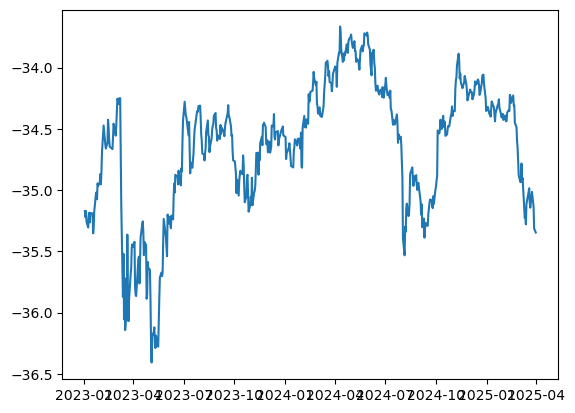

In [26]:
plt.plot(spread)